In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [2]:
df=pd.read_csv('C:/Users/DELL/Documents/AI/excel file/Movie Reviews Sentences for Sentiment Analysis NLP/IMDB Dataset.csv')
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [4]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [5]:
train_reviews=df.review[:40000]
train_sentiments=df.sentiment[:40000]
#test dataset
test_reviews=df.review[40000:]
test_sentiments=df.sentiment[40000:]
print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(40000,) (40000,)
(10000,) (10000,)


In [6]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter


In [7]:
stop_words = set(stopwords.words('english'))


In [8]:
data=df['review']
df=pd.DataFrame(data)
def tokenize_text(text):
    return word_tokenize(text)
df['tokens'] = df['review'].apply(tokenize_text)
df['tokens'].head(10)


0    [One, of, the, other, reviewers, has, mentione...
1    [A, wonderful, little, production, ., <, br, /...
2    [I, thought, this, was, a, wonderful, way, to,...
3    [Basically, there, 's, a, family, where, a, li...
4    [Petter, Mattei, 's, ``, Love, in, the, Time, ...
5    [Probably, my, all-time, favorite, movie, ,, a...
6    [I, sure, would, like, to, see, a, resurrectio...
7    [This, show, was, an, amazing, ,, fresh, &, in...
8    [Encouraged, by, the, positive, comments, abou...
9    [If, you, like, original, gut, wrenching, laug...
Name: tokens, dtype: object

In [9]:
import re,string,unicodedata
def remove_specialcharacters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
df['review']=df['review'].apply(remove_specialcharacters)
print(df['review'])

0        One of the other reviewers has mentioned that ...
1        A wonderful little production br br The filmin...
2        I thought this was a wonderful way to spend ti...
3        Basically theres a family where a little boy J...
4        Petter Matteis Love in the Time of Money is a ...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot bad dialogue bad acting idiotic direc...
49997    I am a Catholic taught in parochial elementary...
49998    Im going to have to disagree with the previous...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object


In [10]:
df['review'] = df['review'].str.lower()
print(df['review'])

0        one of the other reviewers has mentioned that ...
1        a wonderful little production br br the filmin...
2        i thought this was a wonderful way to spend ti...
3        basically theres a family where a little boy j...
4        petter matteis love in the time of money is a ...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    i am a catholic taught in parochial elementary...
49998    im going to have to disagree with the previous...
49999    no one expects the star trek movies to be high...
Name: review, Length: 50000, dtype: object


In [11]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    tokens = text.split()
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    removed_words = [word for word in tokens if word.lower() in stop_words]
    return removed_words

In [12]:
df['removed_stopwords'] = df['review'].apply(remove_stopwords)
print(df['removed_stopwords'])

0        [of, the, other, has, that, after, just, be, t...
1        [a, the, is, very, very, and, a, and, of, to, ...
2        [i, this, was, a, to, on, a, too, in, the, and...
3        [a, where, a, a, in, his, his, are, all, the, ...
4        [in, the, of, is, a, to, a, about, this, is, a...
                               ...                        
49995    [i, this, did, a, down, it, as, or, as, the, b...
49996    [the, that, over, the, and, a, of, the, be, by...
49997    [i, am, a, in, by, by, in, i, am, a, but, not,...
49998    [to, have, to, with, the, and, with, on, this,...
49999    [no, the, to, be, but, the, do, a, that, is, a...
Name: removed_stopwords, Length: 50000, dtype: object


In [13]:
from sklearn.feature_extraction.text import CountVectorizer


In [14]:
cv = CountVectorizer(min_df=1, max_df=1.0, binary=False, ngram_range=(1,3))
cv_train_reviews = cv.fit_transform(train_reviews)
cv_test_reviews = cv.transform(test_reviews)
print('BOW_cv_train:', cv_train_reviews.shape)
print('BOW_cv_test:', cv_test_reviews.shape)


BOW_cv_train: (40000, 7553713)
BOW_cv_test: (10000, 7553713)


In [15]:
max_features = 30
vectorizer = CountVectorizer(max_features =max_features,binary=True)
bow_matrix_binary = vectorizer.fit_transform(df['review'])
bow_df_binary = pd.DataFrame(bow_matrix_binary.toarray(), columns=vectorizer.get_feature_names_out(),index=None)
word_freq_dict=bow_df_binary.sum().to_dict()
print("Dictinary:",word_freq_dict)

Dictinary: {'all': 25322, 'an': 24249, 'and': 48222, 'are': 27570, 'as': 31877, 'at': 25579, 'be': 28045, 'br': 29203, 'but': 35289, 'by': 23248, 'film': 27034, 'for': 35462, 'from': 23161, 'have': 28417, 'in': 43901, 'is': 44683, 'it': 42278, 'its': 24373, 'movie': 29932, 'not': 29531, 'of': 47415, 'on': 31094, 'one': 27693, 'that': 39804, 'the': 49553, 'this': 45204, 'to': 46951, 'was': 32138, 'with': 34686, 'you': 25788}


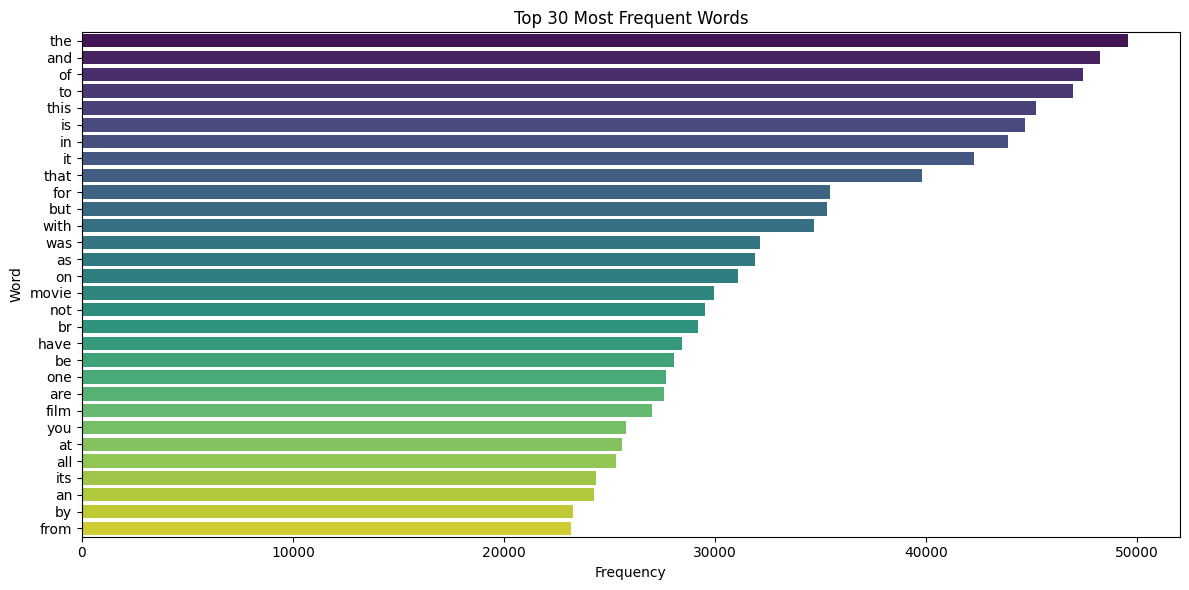

In [16]:
word_freq_df = pd.DataFrame(word_freq_dict.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)
top_words = word_freq_df.head(max_features)
plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Word', hue='Word',data=top_words, palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title(f'Top {max_features} Most Frequent Words')
plt.tight_layout()
plt.show()

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [18]:
tv=TfidfVectorizer(min_df=1,max_df=1.0,use_idf=True,ngram_range=(1,3))
tv_train_reviews=tv.fit_transform(train_reviews)
tv_test_reviews=tv.transform(test_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (40000, 7553713)
Tfidf_test: (10000, 7553713)


In [19]:

from sklearn.preprocessing import LabelBinarizer

In [20]:
lb=LabelBinarizer()
df=pd.read_csv('C:/Users/DELL/Documents/AI/excel file/Movie Reviews Sentences for Sentiment Analysis NLP/IMDB Dataset.csv')
lb

LabelBinarizer()

In [21]:
sentiment_data=lb.fit_transform(df['sentiment'])
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [22]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression
lr

sklearn.linear_model._logistic.LogisticRegression

In [23]:
print('Shape of the csr_matrix:', cv_train_reviews.shape)

Shape of the csr_matrix: (40000, 7553713)


In [24]:
train_sentiments=sentiment_data[:40000]
test_sentiments=sentiment_data[40000:]
print(train_sentiments)
print(test_sentiments)

[[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [25]:

X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(cv_train_reviews, train_sentiments, test_size=0.2, random_state=42)
X_train_tv, X_test_tv, y_train_tv, y_test_tv = train_test_split(tv_train_reviews, train_sentiments, test_size=0.2, random_state=42)
print('Shape of X_train_cv:', X_train_cv.shape)
print('Shape of y_train_cv:', y_train_cv.shape)
print('Shape of X_train_tv:', X_train_tv.shape)
print('Shape of y_train_tv:', y_train_tv.shape)
import numpy as np
y_train_cv = np.ravel(y_train_cv)
y_train_tv = np.ravel(y_train_tv)
print('Shape of y_train_cv after reshaping:', y_train_cv.shape)
print('Shape of y_train_tv after reshaping:', y_train_tv.shape)
lr = LogisticRegression(penalty='l2', max_iter=500, C=1, random_state=42)
lr_bow = lr.fit(X_train_cv, y_train_cv)
lr_tfidf = lr.fit(X_train_tv, y_train_tv)
print(lr_bow)
print(lr_tfidf)


Shape of X_train_cv: (32000, 7553713)
Shape of y_train_cv: (32000, 1)
Shape of X_train_tv: (32000, 7553713)
Shape of y_train_tv: (32000, 1)
Shape of y_train_cv after reshaping: (32000,)
Shape of y_train_tv after reshaping: (32000,)
LogisticRegression(C=1, max_iter=500, random_state=42)
LogisticRegression(C=1, max_iter=500, random_state=42)


In [26]:
#Predicting the model for bag of words
lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)
lr_tfidf_predict=lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

[0 0 1 ... 1 1 0]
[0 0 0 ... 1 0 0]


In [27]:
lr_bow_score=accuracy_score(test_sentiments,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)
#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(test_sentiments,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.7997
lr_tfidf_score : 0.8866


In [28]:

from sklearn.metrics import classification_report

if len(test_sentiments) != len(lr_bow_predict):
    lr_bow_predict = lr_bow_predict[:len(test_sentiments)]
if len(test_sentiments) != len(lr_tfidf_predict):
    lr_tfidf_predict = lr_tfidf_predict[:len(test_sentiments)]
    

lr_bow_report = classification_report(test_sentiments, lr_bow_predict, target_names=['Positive', 'Negative'])
print("Classification Report for Logistic Regression with CountVectorizer:")
print(lr_bow_report)

lr_tfidf_report = classification_report(test_sentiments, lr_tfidf_predict, target_names=['Positive', 'Negative'])
print("\nClassification Report for Logistic Regression with TfidfVectorizer:")
print(lr_tfidf_report)

Classification Report for Logistic Regression with CountVectorizer:
              precision    recall  f1-score   support

    Positive       0.90      0.67      0.77      4993
    Negative       0.74      0.93      0.82      5007

    accuracy                           0.80     10000
   macro avg       0.82      0.80      0.80     10000
weighted avg       0.82      0.80      0.80     10000


Classification Report for Logistic Regression with TfidfVectorizer:
              precision    recall  f1-score   support

    Positive       0.89      0.88      0.89      4993
    Negative       0.88      0.90      0.89      5007

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [29]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,lr_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,lr_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[4633  374]
 [1629 3364]]
[[4488  519]
 [ 615 4378]]


In [30]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm_bow =[[3089, 1918],[3097, 1896]]
cm_tfidf = [[2552 ,2455],[2541 ,2452]]


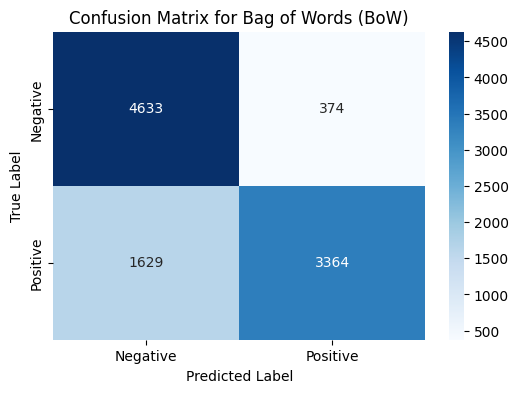

In [41]:
from sklearn.metrics import confusion_matrix
cm_bow =[[4633 , 374] ,[1629, 3364]]
cm_tfidf = [[4488 , 519] ,[ 615, 4378]]
plt.figure(figsize=(6, 4))
sns.heatmap(cm_bow, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Bag of Words (BoW)')
plt.show()

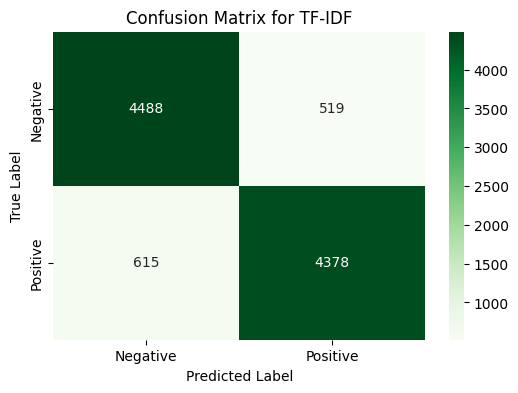

In [42]:
# Plot confusion matrix for TF-IDF
plt.figure(figsize=(6, 4))
sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Greens', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for TF-IDF')
plt.show()

In [33]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
mnb_bow=mnb.fit(cv_train_reviews,train_sentiments)
print(mnb_bow)
mnb_tfidf=mnb.fit(tv_train_reviews,train_sentiments)
print(mnb_tfidf)

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()


C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()


In [34]:
mnb_bow_predict=mnb.predict(cv_test_reviews)
print(mnb_bow_predict)
mnb_tfidf_predict=mnb.predict(tv_test_reviews)
print(mnb_tfidf_predict)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [35]:
if len(test_sentiments) != len(mnb_bow_predict):
    mnb_bow_predict = mnb_bow_predict[:len(test_sentiments)]
if len(test_sentiments) != len(mnb_tfidf_predict):
    mnb_tfidf_predict = mnb_tfidf_predict[:len(test_sentiments)]
mnb_bow_score=accuracy_score(test_sentiments,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)
#Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(test_sentiments,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

mnb_bow_score : 0.8775
mnb_tfidf_score : 0.8937


In [36]:
mnb_bow_report=classification_report(test_sentiments,mnb_bow_predict,target_names=['Positive','Negative'])
print(mnb_bow_report)
mnb_tfidf_report=classification_report(test_sentiments,mnb_tfidf_predict,target_names=['Positive','Negative'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.84      0.93      0.88      4993
    Negative       0.92      0.83      0.87      5007

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

              precision    recall  f1-score   support

    Positive       0.88      0.92      0.90      4993
    Negative       0.91      0.87      0.89      5007

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [37]:
cm_bow=confusion_matrix(test_sentiments,mnb_bow_predict,labels=[1,0])
print(cm_bow)
cm_tfidf=confusion_matrix(test_sentiments,mnb_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[4145  862]
 [ 363 4630]]
[[4353  654]
 [ 409 4584]]


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm_bow =[[4145 , 862] ,[ 363 ,4630]]
cm_tfidf = [[4353 , 654], [ 409, 4584]]



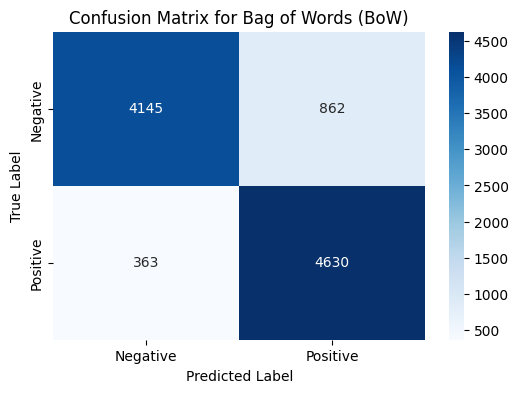

In [44]:
# Plot confusion matrix for Bag of Words (BoW)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_bow, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Bag of Words (BoW)')
plt.show()

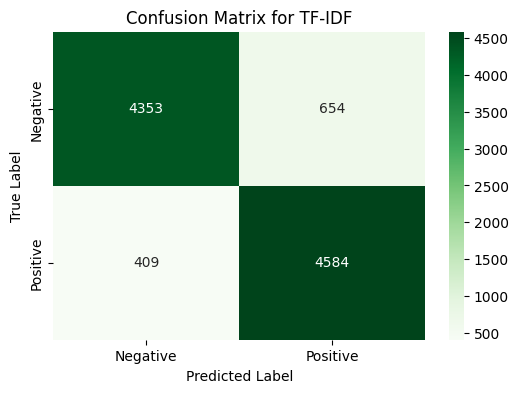

In [45]:
# Plot confusion matrix for TF-IDF
plt.figure(figsize=(6, 4))
sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Greens', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for TF-IDF')
plt.show()
